In [1]:
import seaborn as sns
from tdc.multi_pred import DTI
import pandas as pd

# Drug-Target Interaction Prediction

Determining how well a small-molecule drug binds to a new target protein typically involves screening various compounds to gauge their effectiveness. Traditional methods for this rely on costly and time-consuming high-throughput wet-lab experiments. Unfortunately, these methods struggle when handling a large number of candidate compounds due to their resource-intensive nature. To tackle this challenge, drug-target interaction (DTI) prediction tasks employ computational methods that work virtually, using available structural data of compounds and protein amino acid sequences. By doing so, these computational models aim to predict how well a drug interacts with a target protein without the need for expensive lab experiments. Using techniques like machine learning and molecular modeling, these models offer a cost-effective and efficient means to forecast potential drug-target interactions. This advancement in predictive modeling holds great potential for accelerating drug discovery by quickly identifying promising compounds for further experimental exploration, potentially saving time and resources in the early stages of drug development.

# Dataset : KIBA

The KIBA (Kinase Inhibitor Bioactivity) dataset is a specialized dataset curated specifically for studying the interactions between kinase inhibitors and their target kinases. Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathways.Kinases are a class of enzymes involved in cellular signaling pathways and are significant targets in drug discovery, particularly in cancer treatment and other diseases related to aberrant signaling pathway.

References:

[1] Tang J, Szwajda A, Shakyawar S, et al. Making sense of large-scale kinase inhibitor bioactivity data sets: a comparative and integrative analysis. J Chem Inf Model. 2014;54(3):735-743.

[2] Huang, Kexin, et al. “DeepPurpose: a Deep Learning Library for Drug-Target Interaction Prediction” Bioinformatics.

In [2]:
data_K = DTI(name = 'KIBA')

Found local copy...
Loading...
Done!


# 1 - Preprocessing

In [3]:
data = data_K.get_data()

In [4]:
data_K.print_stats()
print()
print("Binding affinity mean:", data_K.y.mean())

--- Dataset Statistics ---
2068 unique drugs.
229 unique targets.
117657 drug-target pairs.
--------------------------



Binding affinity mean: 11.720685064256795


### Binding affinity values distribution

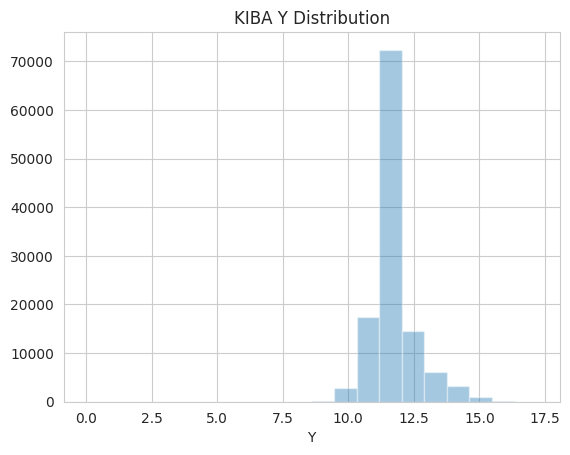

In [34]:
sns.set_style("whitegrid")
Y_plot = sns.distplot(data.Y, kde=False, bins=20).set_title('KIBA Y Distribution')

In [6]:
data.Y.value_counts()

11.200000    15036
11.100000    11881
11.900001     9945
11.300000     8344
11.500000     7573
             ...  
11.803335        1
12.409894        1
12.228427        1
11.035542        1
0.000000         1
Name: Y, Length: 2865, dtype: int64

### Drugs smiles lenght distribution

Text(0.5, 1.0, 'KIBA Drug Length Distribution')

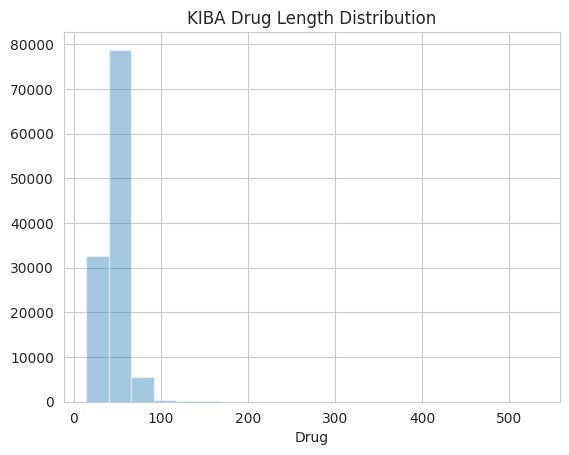

In [35]:
sns.distplot(data.Drug.str.len(), kde=False, bins=20).set_title('KIBA Drug Length Distribution')

## Protein aa lengths distribution

Text(0.5, 1.0, 'KIBA Target Length Distribution')

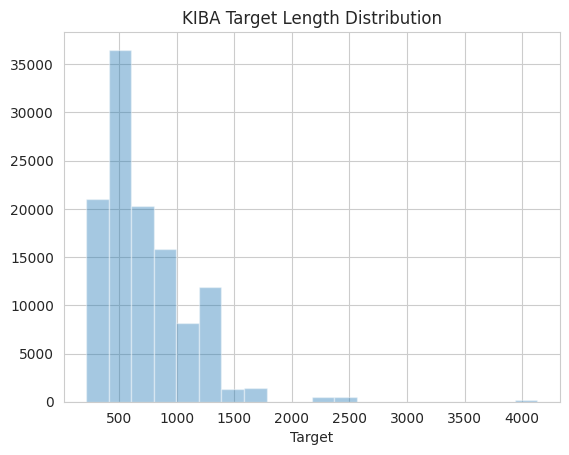

In [33]:
sns.distplot(data.Target.str.len(), kde=False, bins=20).set_title('KIBA Target Length Distribution')

Data binarization - We binarize the y variable (binding affinity) by applying as a treshold the value of 12.1, which, according to literature represents the minimum value where the kinases seem to have some effect on the activity of enzymes. With this, values below the treshold will be represented as "0" and values above the treshold will be represented as "1".


In [9]:
data_binarized = data_K.binarize(threshold = 12.1, order ='ascending') 

Binariztion using threshold 12.1, default, we assume the smaller values are 1 and larger ones is 0, you can change the order by 'binarize(order = 'ascending')'


In [10]:
data_binarized.get_data()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


In [11]:
data_binarized.get_data().Y.value_counts()

0    95091
1    22566
Name: Y, dtype: int64

The obtained binarized dataset has 95091 DTI with seemingly no inhibition and 22566 with some degree of activity inhibition

In [12]:
df_binarized = data_binarized.get_data(format = 'df')
df_binarized.to_csv('KIBA_binarized.csv', index = False)
df_binarized

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0
...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0


# Drugs descriptors

In [13]:
descriptors_smiles = pd.read_csv('drugs_descriptors_smiles.csv')

In [14]:
descriptors_smiles

,Drug_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,0.749475,340.636993,328.540985,338.998444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1088633,COc1cc2c(cc1Cl)C(c1cccc(Cl)c1)=NCC2,6.239307,0.599887,6.239307,0.599887,0.805831,306.191986,293.088013,305.037415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1090360,O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3...,12.754791,-0.070738,12.754791,0.070738,0.216340,587.708984,558.476990,587.210327,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,CHEMBL1688215,Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,5.701094,0.256224,5.701094,0.256224,0.577312,226.242996,216.162994,226.096695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1765781,CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4...,12.919469,-0.376600,12.919469,0.165238,0.483859,473.580994,442.333008,473.253937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,CHEMBL2002182,O=c1[nH]nc2c(-c3ccccc3)cccn12,11.407152,-0.215017,11.407152,0.215017,0.665489,211.223999,202.151993,211.074554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064,CHEMBL1668418,COc1cc(O)c2c(c1)C=CCCCC(=O)C=CCC(C)OC2=O,12.422585,-0.598066,12.422585,0.068241,0.795626,330.380005,308.204010,330.146729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,CHEMBL408982,CCN1C(=CC(C)=O)Sc2ccc(OC)cc21,11.194309,0.074742,11.194309,0.074742,0.770003,249.335007,234.214996,249.082352,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2066,CHEMBL307152,Cn1ccc2ccc3c4[nH]c5c(CCCNC6CCC(O)CC6)cccc5c4c4...,13.124377,-0.327578,13.124377,0.133993,0.210694,494.595001,464.355011,494.231781,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
morgan_fingerprints = pd.read_csv('drugs_morgan_fingerprints.csv')

Remove nan

In [16]:
# shape of the dataframes
print(descriptors_smiles.shape, morgan_fingerprints.shape)
# Remove rows where all values are nan
descriptors_smiles = descriptors_smiles.dropna(how='all')
# don't forget to drop the same rows from the y column
#### y_descriptors = data['Y'].copy()[descriptors.index] ------- confirmar
y_descriptors_smiles = df_binarized['Y'].copy()[descriptors_smiles.index] #-------- confirmar

# we do the same for morgan_fingerprints
morgan_fingerprints = morgan_fingerprints.dropna(how='all')
#### y_morgan = data['Y'].copy()[morgan_fingerprints.index] ------- confirmar
y_morgan = df_binarized['Y'].copy()[morgan_fingerprints.index] #-------- confirmar
# as we can see, the shapes are the same, because there was no invalid molecule
descriptors_smiles.shape, y_descriptors_smiles.shape, morgan_fingerprints.shape, y_morgan.shape

(2068, 210) (2068, 1026)


((2068, 210), (2068,), (2068, 1026), (2068,))

In [17]:
# Checking if any of the descriptors have columns with nan values
descriptors_smiles.isna().any().sum(), morgan_fingerprints.isna().any().sum() 

(0, 0)

# Protein Descriptors

In [18]:
protein_descriptors = pd.read_csv('protein_descriptors.csv')
protein_descriptors

,Target,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,crosscorr_6,moment,global,profile_0,profile_1,arc_0,arc_1,arc_2,arc_3,arc_4
0,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,431.0,6.168,0.000126,2211,3416,574,640,15,7924,...,-0.039397,0.777903,1.062857,0.000135,0.308740,160,160,80,60,60
1,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,756.0,-14.843,-0.000171,3733,5900,1008,1224,40,13982,...,-0.026423,1.019365,0.821429,0.000031,0.363985,160,300,100,80,60
2,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,745.0,-8.616,-0.000102,3714,5853,985,1149,45,13752,...,-0.044804,0.941998,0.877143,-0.000026,0.374775,180,180,60,60,40
3,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,1210.0,-12.897,-0.000096,5826,9137,1597,1835,85,22017,...,0.052784,1.154790,1.100000,0.000003,0.339588,240,280,60,60,40
4,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,1255.0,-32.426,-0.000235,6004,9333,1633,1880,82,22639,...,0.040026,0.963924,1.142857,-0.000009,0.337303,220,220,80,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,MLGTGPAAATTAATTSSNVSVLQQFASGLKSRNEETRAKAAKELQH...,2549.0,-7.013,-0.000024,12731,20074,3428,3862,130,46717,...,-0.038202,1.087857,1.011429,0.000002,0.387740,200,320,80,80,40
225,MVSSQKLEKPIEMGSSEPLPIADGDRRRKKKRRGRATDSLPGKFED...,465.0,-3.844,-0.000075,2227,3519,613,716,22,8344,...,-0.001884,1.035476,0.957143,-0.000040,0.356987,160,200,100,60,60
226,MRHSKRTYCPDWDDKDWDYGKWRSSSSHKRRKRSHSSAQENKRCKY...,484.0,16.713,0.000292,2503,3859,747,750,22,9159,...,0.098283,0.968372,0.944286,0.000219,0.314280,160,340,120,60,40
227,MGDTVVEPAPLKPTSEPTSGPPGNNGGSLLSVITEGVGELSVIDPE...,816.0,-14.527,-0.000159,3983,6286,1086,1277,32,14740,...,-0.058385,0.883325,0.840000,0.000056,0.333261,140,300,60,60,60


# Drug Encondings

In [19]:
drug_encoding = pd.read_csv('drug_encoding.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'drug_encoding.csv'

# Protein Encodings

In [20]:
protein_encoding = pd.read_csv('protein_encoding.csv')

Join the drug descriptors and morgan fingerprints


In [21]:
descriptors_smiles.shape, morgan_fingerprints.shape

((2068, 210), (2068, 1026))

In [22]:
# join the drug descriptors and morgan fingerprints by Drug_ID and not duplicate Drug column

descriptors_drugs= descriptors_smiles.merge(morgan_fingerprints, on='Drug_ID', how='left')
descriptors_drugs = descriptors_drugs.drop(columns='Drug_y')
descriptors_drugs = descriptors_drugs.rename(columns={'Drug_x': 'Drug'})
descriptors_drugs


,Drug_ID,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,0.749475,340.636993,328.540985,338.998444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1088633,COc1cc2c(cc1Cl)C(c1cccc(Cl)c1)=NCC2,6.239307,0.599887,6.239307,0.599887,0.805831,306.191986,293.088013,305.037415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1090360,O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3...,12.754791,-0.070738,12.754791,0.070738,0.216340,587.708984,558.476990,587.210327,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL1688215,Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,5.701094,0.256224,5.701094,0.256224,0.577312,226.242996,216.162994,226.096695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1765781,CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4...,12.919469,-0.376600,12.919469,0.165238,0.483859,473.580994,442.333008,473.253937,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,CHEMBL2002182,O=c1[nH]nc2c(-c3ccccc3)cccn12,11.407152,-0.215017,11.407152,0.215017,0.665489,211.223999,202.151993,211.074554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2064,CHEMBL1668418,COc1cc(O)c2c(c1)C=CCCCC(=O)C=CCC(C)OC2=O,12.422585,-0.598066,12.422585,0.068241,0.795626,330.380005,308.204010,330.146729,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2065,CHEMBL408982,CCN1C(=CC(C)=O)Sc2ccc(OC)cc21,11.194309,0.074742,11.194309,0.074742,0.770003,249.335007,234.214996,249.082352,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2066,CHEMBL307152,Cn1ccc2ccc3c4[nH]c5c(CCCNC6CCC(O)CC6)cccc5c4c4...,13.124377,-0.327578,13.124377,0.133993,0.210694,494.595001,464.355011,494.231781,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Join all features

In [23]:

# join the descriptors_drugs to the data_binarized by Drug_ID 

descriptors_all = df_binarized.merge(descriptors_drugs, on='Drug_ID', how='left')
descriptors_all


,Drug_ID,Drug_x,Target_ID,Target,Y,Drug_y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,6.243423,0.517221,6.243423,0.517221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,13.565043,-0.520288,13.565043,0.018798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,13.565043,-0.520288,13.565043,0.018798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,13.565043,-0.520288,13.565043,0.018798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,13.565043,-0.520288,13.565043,0.018798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
descriptors_all = descriptors_all.drop(columns='Drug_y')
descriptors_all = descriptors_all.rename(columns={'Drug_x': 'Drug'})
descriptors_all

,Drug_ID,Drug,Target_ID,Target,Y,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
# join the protein descriptors to the data_binarized by Target

descriptors_all = descriptors_all.merge(protein_descriptors, on='Target_ID', how='left')
descriptors_all.drop(columns='Y_x')
descriptors_all = descriptors_all.rename(columns={'Y_y': 'Y'})
descriptors_all

,Drug_ID,Drug,Target_ID,Target,Y_x,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,crosscorr_6,moment,global,profile_0,profile_1,arc_0,arc_1,arc_2,arc_3,arc_4
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,-0.039397,0.777903,1.062857,0.000135,0.308740,160.0,160.0,80.0,60.0,60.0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,-0.026423,1.019365,0.821429,0.000031,0.363985,160.0,300.0,100.0,80.0,60.0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,-0.044804,0.941998,0.877143,-0.000026,0.374775,180.0,180.0,60.0,60.0,40.0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.052784,1.154790,1.100000,0.000003,0.339588,240.0,280.0,60.0,60.0,40.0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.040026,0.963924,1.142857,-0.000009,0.337303,220.0,220.0,80.0,60.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
descriptors_all

,Drug_ID,Drug,Target_ID,Target,Y_x,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,crosscorr_6,moment,global,profile_0,profile_1,arc_0,arc_1,arc_2,arc_3,arc_4
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O00141,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,-0.039397,0.777903,1.062857,0.000135,0.308740,160.0,160.0,80.0,60.0,60.0
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,-0.026423,1.019365,0.821429,0.000031,0.363985,160.0,300.0,100.0,80.0,60.0
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O15111,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,-0.044804,0.941998,0.877143,-0.000026,0.374775,180.0,180.0,60.0,60.0,40.0
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P00533,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.052784,1.154790,1.100000,0.000003,0.339588,240.0,280.0,60.0,60.0,40.0
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,0,6.243423,0.517221,6.243423,0.517221,0.749475,...,0.040026,0.963924,1.142857,-0.000009,0.337303,220.0,220.0,80.0,60.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117652,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13554,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117653,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13555,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117654,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q13557,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117655,CHEMBL230654,CCCc1nc[nH]c1CNc1cc(Cl)c2ncc(C#N)c(Nc3ccc(F)c(...,Q16539,NaN,0,13.565043,-0.520288,13.565043,0.018798,0.284428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Standardization

### Standardizing descriptors Drugs

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors_drugs = scaler.fit_transform(drug_descriptors.iloc[:, 1:])
scaled_descriptors_drugs

array([[-1.85944259,  0.93835485, -1.85944259, ..., -0.12536783,
        -0.08547737, -0.08255888],
       [-1.86091046,  0.99849655, -1.86091046, ..., -0.12536783,
        -0.08547737, -0.08255888],
       [ 0.46318281,  0.51059917,  0.46318281, ..., -0.12536783,
        -0.08547737, -0.08255888],
       ...,
       [-0.09344596,  0.61643938, -0.09344596, ..., -0.12536783,
        -0.08547737, -0.08255888],
       [ 0.59501527,  0.32374096,  0.59501527, ..., -0.12536783,
        -0.08547737, -0.08255888],
       [ 0.75220227,  0.18353958,  0.75220227, ...,  7.97652807,
        -0.08547737, -0.08255888]])

### Standardizing descriptors Proteins

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_descriptors_proteins = scaler.fit_transform(protein_descriptors.iloc[:, 1:])
scaled_descriptors_proteins

array([[-0.68798439,  0.63796288,  0.79493824, ...,  0.17169438,
        -0.54040495,  0.42695952],
       [ 0.06244412, -0.79574256, -0.83066327, ...,  1.15464469,
         0.63819251,  0.42695952],
       [ 0.037045  , -0.37083733, -0.44995179, ..., -0.81125594,
        -0.54040495, -0.57073161],
       ...,
       [-0.56560682,  1.35751091,  1.70036053, ...,  2.137595  ,
        -0.54040495, -0.57073161],
       [ 0.20098477, -0.77418   , -0.76239676, ..., -0.81125594,
        -0.54040495,  0.42695952],
       [ 0.49192013, -0.47564774, -0.42745487, ..., -0.81125594,
        -0.54040495,  0.42695952]])

# Feature Selection

### Feature Selection Drugs

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors_drugs = selector.fit_transform(scaled_descriptors_drugs)
selected_columns_smiles = drug_descriptors.iloc[:, 1:].columns[selector.get_support()]
selected_descriptors_drugs.shape, selected_columns_smiles

((2068, 1220),
 Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
        'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
        'NumValenceElectrons', 'NumRadicalElectrons',
        ...
        'morgan_1014', 'morgan_1015', 'morgan_1016', 'morgan_1017',
        'morgan_1018', 'morgan_1019', 'morgan_1020', 'morgan_1021',
        'morgan_1022', 'morgan_1023'],
       dtype='object', length=1220))

In [ ]:
selected_descriptors_drugs_df = pd.DataFrame(selected_descriptors_drugs, columns=selected_columns_smiles)
selected_descriptors_drugs_df.insert(0, 'Drug', drug_descriptors['Drug'])
selected_descriptors_drugs_df

,Drug,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,morgan_1014,morgan_1015,morgan_1016,morgan_1017,morgan_1018,morgan_1019,morgan_1020,morgan_1021,morgan_1022,morgan_1023
0,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,-1.859443,0.938355,-1.859443,1.632718,1.118086,-0.381383,-0.345863,-0.389291,-0.648954,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,-0.591498,-0.203197,-0.125368,-0.085477,-0.082559
1,COc1cc2c(cc1Cl)C(c1cccc(Cl)c1)=NCC2,-1.860910,0.998497,-1.860910,2.060584,1.396775,-0.599581,-0.580465,-0.604565,-0.749162,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,-0.591498,-0.203197,-0.125368,-0.085477,-0.082559
2,O=C(Cc1ccccc1)Nc1cccc(-c2nc3sccn3c2-c2ccnc(Nc3...,0.463183,0.510599,0.463183,-0.678208,-1.518319,1.183741,1.175685,1.184084,1.121390,...,5.886864,-0.125368,-0.125368,-0.189927,-0.127343,-0.591498,-0.203197,-0.125368,-0.085477,-0.082559
3,Nc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,-2.052893,0.748472,-2.052893,0.281837,0.266721,-1.106033,-1.089498,-1.104957,-1.049787,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,-0.591498,-0.203197,-0.125368,-0.085477,-0.082559
4,CNc1cncc(-c2c[nH]c(=O)c(NC(=O)c3ccc(N4CCCC4CN4...,0.521924,0.288076,0.521924,-0.189088,-0.195411,0.460776,0.407129,0.461733,0.586946,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,1.690624,-0.203197,-0.125368,-0.085477,-0.082559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,O=c1[nH]nc2c(-c3ccccc3)cccn12,-0.017524,0.405632,-0.017524,0.068561,0.702769,-1.201174,-1.182213,-1.200180,-1.149995,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,-0.591498,-0.203197,-0.125368,-0.085477,-0.082559
2064,COc1cc(O)c2c(c1)C=CCCCC(=O)C=CCC(C)OC2=O,0.344684,0.126954,0.344684,-0.691133,1.346306,-0.446358,-0.480438,-0.445401,-0.314927,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,1.690624,-0.203197,-0.125368,-0.085477,-0.082559
2065,CCN1C(=CC(C)=O)Sc2ccc(OC)cc21,-0.093446,0.616439,-0.093446,-0.657484,1.219602,-0.959753,-0.970043,-0.959255,-0.949579,...,-0.169870,-0.125368,-0.125368,5.265190,-0.127343,-0.591498,4.921332,-0.125368,-0.085477,-0.082559
2066,Cn1ccc2ccc3c4[nH]c5c(CCCNC6CCC(O)CC6)cccc5c4c4...,0.595015,0.323741,0.595015,-0.350810,-1.546241,0.593893,0.552855,0.594708,0.687154,...,-0.169870,-0.125368,-0.125368,-0.189927,-0.127343,1.690624,-0.203197,-0.125368,-0.085477,-0.082559


### Feature Selection Proteins

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# select features with variance > 0.01
selector = VarianceThreshold(threshold=0.01)
selected_descriptors_proteins = selector.fit_transform(scaled_descriptors_proteins)
selected_columns_proteins= protein_descriptors.iloc[:, 1:].columns[selector.get_support()]
selected_descriptors_proteins.shape, selected_columns_proteins

((229, 1595),
 Index(['length', 'charge', 'chargedensity', 'formulaC', 'formulaH', 'formulaN',
        'formulaO', 'formulaS', 'tot', 'hydrogen',
        ...
        'crosscorr_6', 'moment', 'global', 'profile_0', 'profile_1', 'arc_0',
        'arc_1', 'arc_2', 'arc_3', 'arc_4'],
       dtype='object', length=1595))

In [ ]:
selected_descriptors_proteins_df = pd.DataFrame(selected_descriptors_proteins, columns=selected_columns_proteins)
selected_descriptors_proteins_df.insert(0, 'Target', protein_descriptors['Target'])
selected_descriptors_proteins_df

,Target,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,tot,...,crosscorr_6,moment,global,profile_0,profile_1,arc_0,arc_1,arc_2,arc_3,arc_4
0,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,-0.687984,0.637963,0.794938,-0.653169,-0.660848,-0.705620,-0.713569,-0.786039,-0.676383,...,-1.192438,-2.447483,1.267644,0.935372,-0.995189,-0.015195,-1.195859,0.171694,-0.540405,0.426960
1,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,0.062444,-0.795743,-0.830663,0.055571,0.076520,0.055053,0.161766,0.318002,0.088995,...,-0.926218,0.377475,-0.835099,0.221622,0.194515,-0.015195,1.326459,1.154645,0.638193,0.426960
2,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,0.037045,-0.370837,-0.449952,0.046723,0.062569,0.014741,0.049351,0.538811,0.059937,...,-1.303386,-0.527669,-0.349850,-0.166940,0.426876,0.481887,-0.835528,-0.811256,-0.540405,-0.570732
3,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,1.110735,-0.662955,-0.418538,1.030204,1.037415,1.087396,1.077569,2.305277,1.104151,...,0.699100,1.961861,1.591142,0.032923,-0.330866,1.973133,0.966128,-0.811256,-0.540405,-0.570732
4,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,1.214641,-1.995535,-1.178492,1.113092,1.095597,1.150493,1.145018,2.172792,1.182735,...,0.437319,-0.271155,1.964410,-0.052173,-0.380091,1.476051,-0.114865,0.171694,-0.540405,0.426960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,MLGTGPAAATTAATTSSNVSVLQQFASGLKSRNEETRAKAAKELQH...,4.202501,-0.261455,-0.026355,4.245611,4.284033,4.296596,4.115759,4.292551,4.224791,...,-1.167921,1.178794,0.819722,0.025929,0.706074,0.978969,1.686790,0.171694,0.638193,-0.570732
225,MVSSQKLEKPIEMGSSEPLPIADGDRRRKKKRRGRATDSLPGKFED...,-0.609478,-0.045215,-0.302818,-0.645719,-0.630273,-0.637265,-0.599655,-0.476907,-0.623319,...,-0.422682,0.565966,0.346916,-0.265992,0.043813,-0.015195,-0.475197,1.154645,-0.540405,0.426960
226,MRHSKRTYCPDWDDKDWDYGKWRSSSSHKRRKRSHSSAQENKRCKY...,-0.565607,1.357511,1.700361,-0.517196,-0.529345,-0.402402,-0.548694,-0.476907,-0.520351,...,1.632753,-0.219109,0.234936,1.506865,-0.875889,-0.015195,2.047121,2.137595,-0.540405,-0.570732
227,MGDTVVEPAPLKPTSEPTSGPPGNNGGSLLSVITEGVGELSVIDPE...,0.200985,-0.774180,-0.762397,0.171986,0.191104,0.191764,0.241205,-0.035291,0.184762,...,-1.582070,-1.214110,-0.673349,0.393204,-0.467129,-0.512277,1.326459,-0.811256,-0.540405,0.426960


# asdaskjdhaskdhaskjdhaskjdhaskjdhaskjdhaskh

UMAP (Dimensionality reduction)

In [ ]:
# UMAP
import umap.umap_ as umap

# create UMAP object
umap_obj = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation', random_state=42)
# fit UMAP
umap_obj.fit(selected_descriptors_drugs_df.iloc[:, 1:])

2024-01-05 16:15:26.236358: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-05 16:15:26.632615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 16:15:26.632707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 16:15:26.689284: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 16:15:26.817075: I tensorflow/core/platform/cpu_feature_guar

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.3, n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
# plot UMAP
import seaborn as sns

sns.scatterplot(x=umap_obj.embedding_[:, 0], y=umap_obj.embedding_[:, 1], hue = , palette='Spectral')

NameError: name 'y_descriptors_smiles' is not defined